In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X_train = np.load("../data/X_train.npy")
Y_train = np.load("../data/Y_train.npy")

X_test = np.load("../data/X_test.npy")
Y_test = np.load("../data/Y_test.npy")

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "MLP (Neural Net)": MLPClassifier(max_iter=1000)
}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    print(f"\n🔹 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(Y_test, y_pred))




🔹 Logistic Regression
Accuracy: 0.8052
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154


🔹 Decision Tree
Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       107
           1       0.58      0.66      0.62        47

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.76      0.75      0.76       154


🔹 Random Forest
Accuracy: 0.7922
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.67      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0

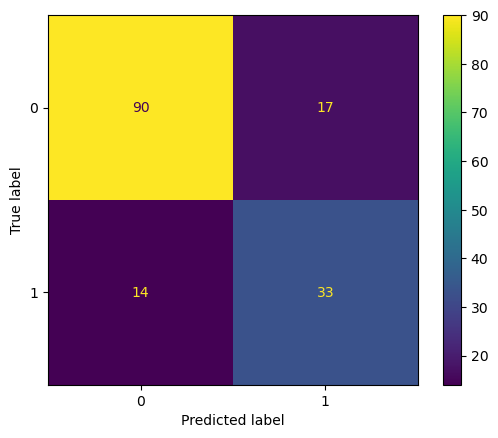

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [11]:
import joblib 
model = MLPClassifier(max_iter=1000, random_state=42)
model.fit(X_train, Y_train)

# Sauvegarder le modèle
joblib.dump(model, "../output/mlp_model.pkl")

['../output/mlp_model.pkl']

In [13]:

y_pred = model.predict(X_test)


df_pred = pd.DataFrame({
    "True_Label": Y_test,
    "Predicted_Label": y_pred
})
df_pred.to_csv("../output/predictions.csv", index=False)


report = classification_report(Y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv("../output/classification_report.csv")


conf_matrix = confusion_matrix(Y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix)
df_conf_matrix.to_csv("../output/confusion_matrix.csv", index=False)
